## Processamento de Alto Desempenho (CAP-241-4)

Repositório para armazenar exercícios e experimentos criados para a matéria de Processamento de Alto Desempenho do curso de Computação Aplicada 1 (CAP-241-4) do programa de pós-graduação em Computação Aplicada do Instituto Nacional de Pesquisas Espaciais (INPE)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

1) Considere umatarefa que pode ser dividida em sub-tarefas com durações de 15, 25, 30 e 20 segundos, respectivamente. Cada sub-tarefa é executada por um módulo especializado, e a execução é feita em modo pipeline.

- (a) Qual é o tempo de ciclo mínimo para o pipeline ?
- (b) Supondo que  existam  100  tarefas  a  executar,  qual  o speedupem  relação  à execução num modo estritamente serial?
- (c) Caso seja possível subdividir umadas sub-tarefas em duas novas sub-tarefas de igual  duração,  associando  um  módulo  para a execução de cada uma, qual das sub-tarefas deve ser escolhida para divisão?
- (d)Após a divisão proposta no ítem anterior, qual o novo speedup possível em relação à execução estritamente serial das 100 tarefas?

In [2]:
# ToDo

2) Considere  a  expressão  para  o  speedup vista  em  aula, SP=1/(1-f+f/P).  Plote  o  speedup como  função  do  número  de  processadores  (P),  dentro  do  intervalo    $1 \leq P \leq 128$, supondo que a fração paralelizável (f) de um programa corresponde a: 

- (a) 98%
- (b) 80%

In [3]:
speedup_amdahl = lambda f, p: 1 / (1 - f + (f / p))

In [4]:
questao_a = [speedup_amdahl(0.98, i) for i in range(1, 129)]
questao_b = [speedup_amdahl(0.80, i) for i in range(1, 129)]

In [5]:
len(questao_a)

128

Text(0, 0.5, 'SpeedUp')

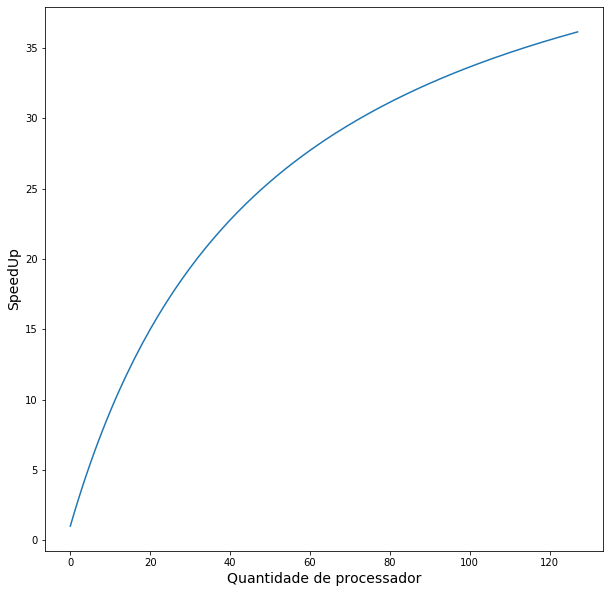

In [6]:
plt.figure(figsize=(10, 10))
plt.plot(questao_a)
plt.xlabel('Quantidade de processador', fontsize=14)
plt.ylabel('SpeedUp', fontsize=14)

Text(0, 0.5, 'SpeedUp')

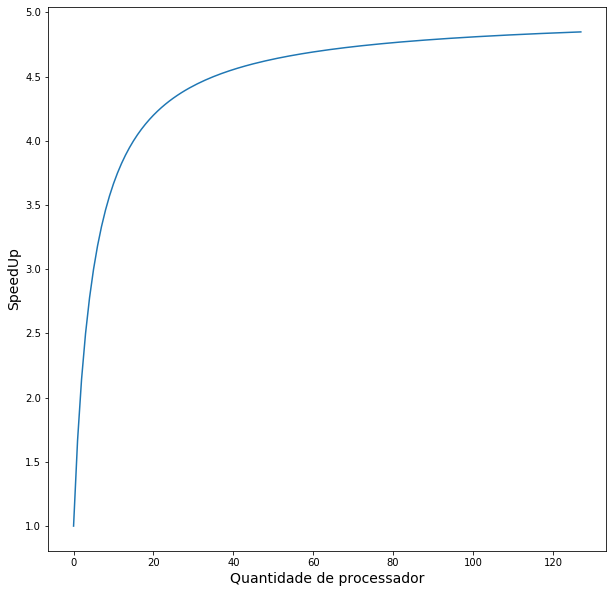

In [7]:
plt.figure(figsize=(10, 10))
plt.plot(questao_b)
plt.xlabel('Quantidade de processador', fontsize=14)
plt.ylabel('SpeedUp', fontsize=14)

3) Plote  agora  o  speedup  em  função  da  fração  paralelizável (f)  de  um  programa,  para  o intervalo  $0 < f < 1$, supondo um sistema com:

- (a) 8 processadores
- (b)128 processadores

In [8]:
speedup_amdahl = lambda f, p: 1 / (1 - f + (f / p))

In [9]:
questao_a = speedup_amdahl(np.arange(0.1, 1.1, 0.1), 8)
questao_b = speedup_amdahl(np.arange(0.1, 1.1, 0.1), 128)

Text(0, 0.5, 'SpeedUp')

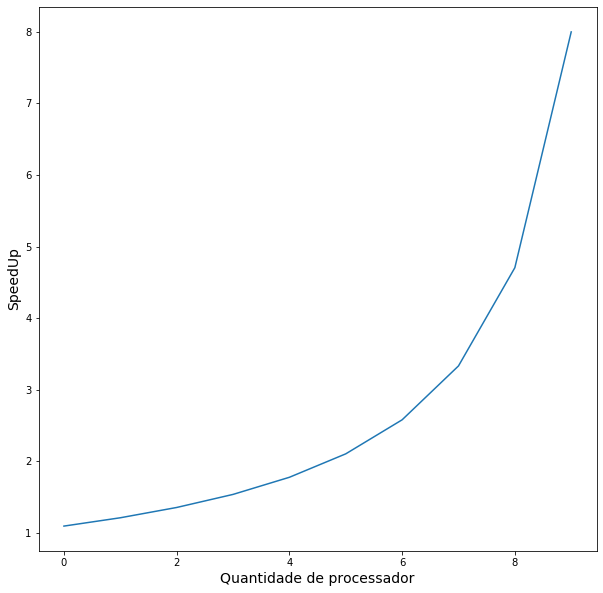

In [10]:
plt.figure(figsize=(10, 10))
plt.plot(questao_a)
plt.xlabel('Quantidade de processador', fontsize=14)
plt.ylabel('SpeedUp', fontsize=14)

Text(0, 0.5, 'SpeedUp')

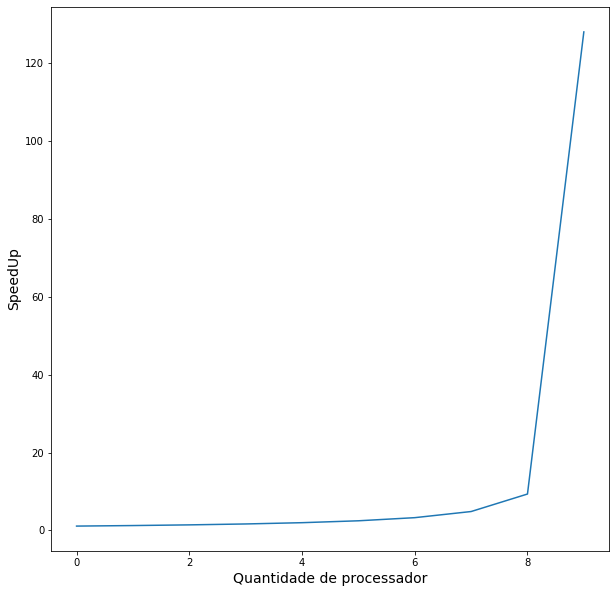

In [11]:
plt.figure(figsize=(10, 10))
plt.plot(questao_b)
plt.xlabel('Quantidade de processador', fontsize=14)
plt.ylabel('SpeedUp', fontsize=14)

5) Utilizando  as  mesmas  escalas  dos  gráficos  construídos  acima  em `2-a` e em  `3-a`, respectivamente, plote o `speedup-em-escala` para os seguintes casos:

- (a) $f = 98\% ,  1 \le P \le 128$
- (b) 8 processadores ,  $0 < f < 1$

In [12]:
speedup_gustafson = lambda f, p: (p-1) * (f + 1)

In [13]:
questao_a = speedup_gustafson(0.98, np.arange(1, 129))
questao_b = speedup_gustafson(np.arange(0.1, 1.1, 0.1), 8)

Text(0, 0.5, 'SpeedUp')

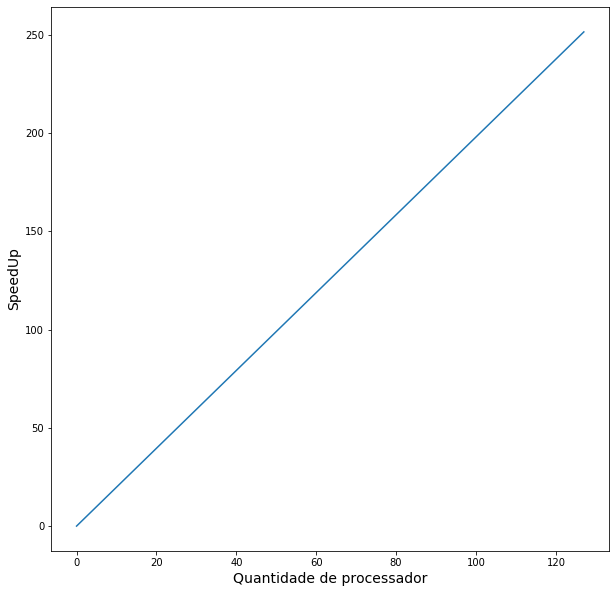

In [14]:
plt.figure(figsize=(10, 10))
plt.plot(questao_a)
plt.xlabel('Quantidade de processador', fontsize=14)
plt.ylabel('SpeedUp', fontsize=14)

Text(0, 0.5, 'SpeedUp')

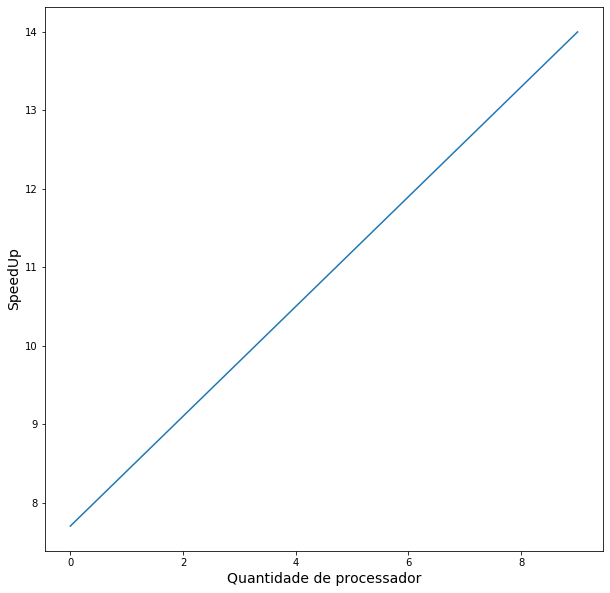

In [15]:
plt.figure(figsize=(10, 10))
plt.plot(questao_b)
plt.xlabel('Quantidade de processador', fontsize=14)
plt.ylabel('SpeedUp', fontsize=14)